# OLS, Lasso and Ridge

## OLS

Find the coefficients $\hat{\beta}_1$ ... $\hat{\beta}_p$ such that $SSR = \sum_{i=1}^n(y_i-\hat{y}_i)^2$ is minimized, where $y_i$'s are the observed Sell Prices and $\hat{y}_i=X_i^T\hat{\beta}$ the estimated Sell Prices.
<br>

Solution of this will be: $\hat{\beta} = (X^TX)^{-1}X^Ty = \beta + (X^TX)^{-1}X^T\epsilon$.
<br>

This is the Best Linear Unbiased Estimator under the Gauss-Markov Assumptions.
<br>

Later I will look at other linear estimators which are not necessarily unbiased, but maybe have a lower variance such that the bias these estimators induce will be offset by that.
<br>

Looking at non-linear regression models is probably not necessary in this Housing Pricing problem.

#### Import Relevant Libraries

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#### Load Boston Housing Data

In [2]:
from sklearn.datasets import load_boston
load_data = load_boston()

In [3]:
# The regressors
data = pd.DataFrame(load_data.data, columns=load_data.feature_names) 

# The dependent variable
data["SalePrice"] = load_data.target 
data['SalePrice'] = np.log1p(data['SalePrice'])

In [4]:
X = data.drop(["SalePrice"], axis=1) 
y = data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [5]:
lin_reg = LinearRegression() 
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test) 

In [6]:
def metrics_calculator(y_pred, y_test, head):
    mse = mean_squared_error(y_pred, y_test)
    print('Metrics of %s regression:\n' % (head))
    print("MSE:   ", mse)
    print("RMSE:  ", np.sqrt(mse))
    print("R^2:   ", r2_score(y_pred, y_test))  

In [7]:
def pred_actual_plot(y_pred, y_test, head):
    plt.scatter(y_test, y_pred, c='crimson')
    plt.plot([1.5, 4.5], [1.5, 4.5], 'b-')
    plt.xlabel('Actual Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.title('Preditions vs Actual Values (%s)' % (head), fontsize=15)

In [8]:
metrics_calculator(y_pred, y_test, "OLS")

Metrics of OLS regression:

MSE:    0.05027415068426404
RMSE:   0.22421897931322415
R^2:    0.5320633144867816


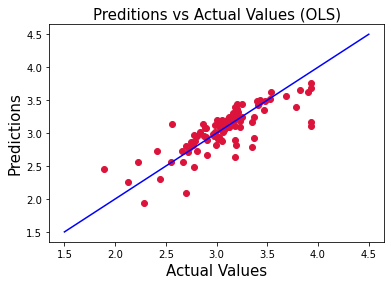

In [9]:
pred_actual_plot(y_pred, y_test, "OLS")

## Lasso

Instead of minimizing the sum of squared residuals Lasso looks at the following problem: 
Find the coefficients $\hat{\beta}_1$ ... $\hat{\beta}_p$ such that $\sum_{i=1}^n(y_i-\hat{y}_i)^2+\alpha\sum_{j=1}^p|\hat{\beta}_j|$ is minimized, $\alpha\geq0$ (if $\alpha=0$, lasso gives the same estimates as OLS since it solves the same problem).
<br>

Lasso penalizes high absolute values of coefficients. Because of this it is of importance that regressors are standardized since regressors with high coefficients in absolute value are not necessarily more informative about the dependent variable. Consider for example a regressor for weight: if weights are reported in kilograms in stead of pounds coefficients in absolute value are higher but meassure the same effect.
<br>

Since Lasso not minimizes the SSR if $\alpha>0$, like OLS, it less subject to overfitting the data. Generally speaking Lasso works well if only a few regressors influence the dependent variable, this is the case since Lasso performs variable selection. Also, when n<<p or when there is $\underline{some}$ multilollinearity Lasso may be useful.
<br>

In this specific problem n>>p, so using Lasso is probably not necessary since overfitting is not really a problem, but we will see.

In [10]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'SalePrice'],
      dtype='object')

#### Scale the regressors

In [11]:
scaler = StandardScaler()
data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
      'RM', 'AGE', 'DIS', 'RAD', 'TAX',
      'PTRATIO', 'B', 'LSTAT']] = scaler.fit_transform(data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                                                             'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                                                             'PTRATIO', 'B', 'LSTAT']])

In [12]:
data.describe()
# mean and variance standardized

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000
mean,-8.513173e-17,3.306534e-16,2.804081e-16,-3.100287e-16,-8.071058e-16,-5.189086e-17,-2.650493e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.451408e-16,-1.595123e-16,3.085437
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,0.386966
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,1.791759
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,2.891757
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,3.100092
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,3.258097
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,3.931826


#### Divide data in training and test sets

In [13]:
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


#### Find the 'best' alpha

In [15]:
alphas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10, 15)
num_alpha = 8
pred_alpha = X.shape[1]
test_mse = np.zeros(num_alpha)

In [16]:
for index, i in enumerate(alphas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    test_mse[index] = mean_squared_error(y_pred, y_test)

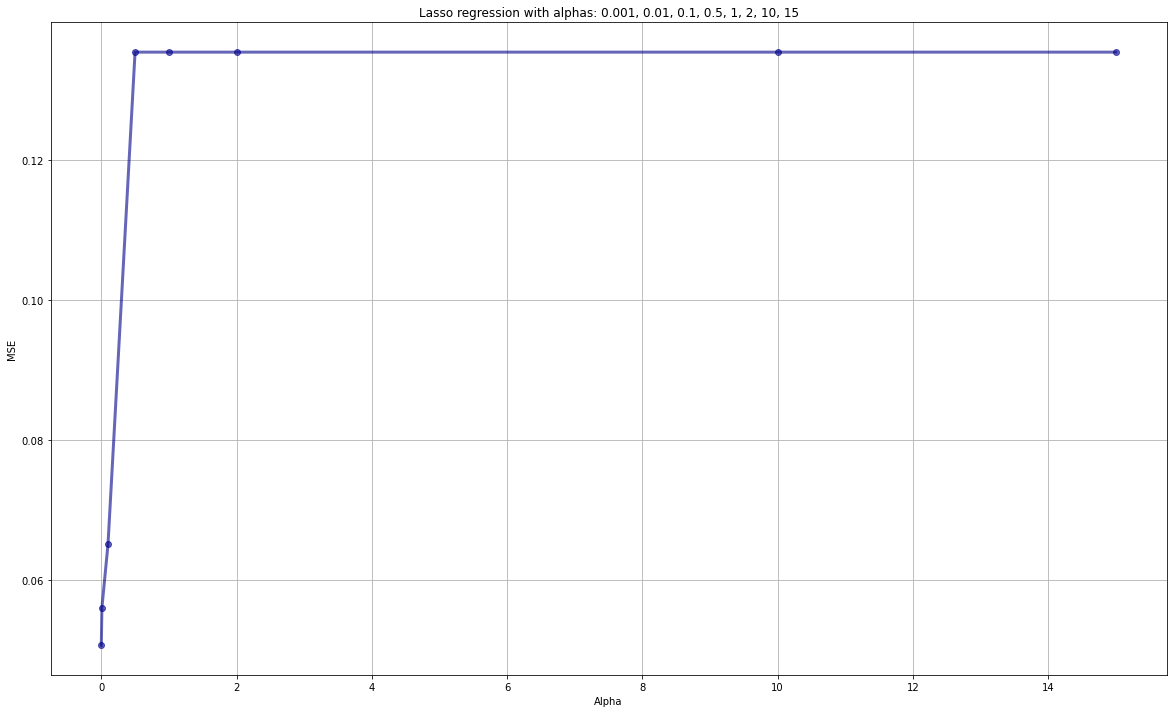

In [17]:
plt.figure(figsize=(20, 12))
x_axis = [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 15]
plt.plot(x_axis, test_mse, 'bo-', color="darkblue", alpha=0.6, linewidth=3)
plt.xlabel('Alpha'); plt.ylabel('MSE')
plt.title('Lasso regression with alphas: 0.001, 0.01, 0.1, 0.5, 1, 2, 10, 15')
plt.grid()

#### OLS is probably the right method since $\alpha$'s close to 0 give the best results.

In [18]:
reg_best_alpha = Lasso(alpha = 0.001)
reg_best_alpha.fit(X_train, y_train)
las_pred = reg_best_alpha.predict(X_test)
reg_best_alpha.coef_

array([-0.0838452 ,  0.01887018,  0.00328969,  0.02270286, -0.06667312,
        0.06488835, -0.00030319, -0.08393337,  0.08406176, -0.07868819,
       -0.08441542,  0.03992016, -0.18202435])

In [19]:
metrics_calculator(y_test, las_pred, "Lasso")

Metrics of Lasso regression:

MSE:    0.05075382763975241
RMSE:   0.22528610174565233
R^2:    0.6249850022961809


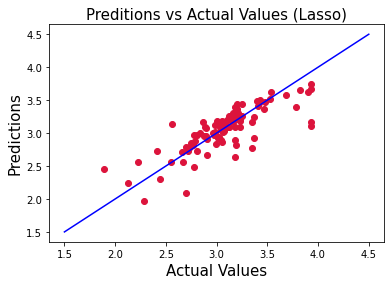

In [20]:
pred_actual_plot(las_pred, y_test, "Lasso")

#### Another approach to find an appropriate $\alpha$ would be with Cross-Validation:

In [21]:
alphas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10, 15)
for i in alphas:
    lasso = Lasso(alpha = i)
    scores = cross_val_score(lasso, X, y)
    print("Accuracy alpha=%.3f: mean = %0.2f, variance = %0.2f \n" % (i, scores.mean(), scores.std()**2))

Accuracy alpha=0.001: mean = 0.60, variance = 0.01 

Accuracy alpha=0.010: mean = 0.59, variance = 0.02 

Accuracy alpha=0.100: mean = 0.25, variance = 0.16 

Accuracy alpha=0.500: mean = -0.70, variance = 0.60 

Accuracy alpha=1.000: mean = -0.70, variance = 0.60 

Accuracy alpha=2.000: mean = -0.70, variance = 0.60 

Accuracy alpha=10.000: mean = -0.70, variance = 0.60 

Accuracy alpha=15.000: mean = -0.70, variance = 0.60 



#### Cross-Validation with an $\alpha$ equal to 0.001 or 0.01 give approximately the same accuracy.

## Ridge

Ridge regession looks at the following problem: 
Find the coefficients $\hat{\beta}_1$ ... $\hat{\beta}_p$ such that $\sum_{i=1}^n(y_i-\hat{y}_i)^2+\alpha\sum_{j=1}^p(\hat{\beta}_j)^2$ is minimized, $\alpha\geq0$ (if $\alpha=0$, Ridge gives the same estimates as OLS since it solves the same problem).
<br>

Solution of this problem: $\hat{\beta}_{Ridge}=(X^TX+\alpha I_p)^{-1}X^Ty$, where $I_p$ is a $p \times p$ indentity matrix.
<br>

Also for Ridge, regressors need to be scaled. Ridge does not perform variable selection, some coefficients can be small but will not be equal to 0. Generally speaking Ridge works well if most of the regressors have an impact on the dependent variable. Also, when n<<p or when there is $\underline{some}$ multilollinearity Ridge may be useful.

In [22]:
rid = Ridge().fit(X_train, y_train )

In [23]:
rid_pred = rid.predict(X_test)

In [24]:
metrics_calculator(rid_pred, y_test, "Ridge")

Metrics of Ridge regression:

MSE:    0.05041213981999707
RMSE:   0.22452647910657902
R^2:    0.5303071595733362


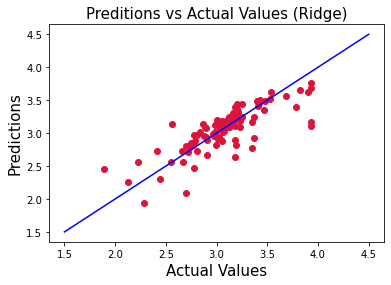

In [25]:
pred_actual_plot(rid_pred, y_test, "Ridge")

## Data Analyis

In [26]:
print(load_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Data analysis

In [27]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,3.218876
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,3.117950
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,3.575151
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,3.538057
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,3.616309
5,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322,3.391147
6,-0.410243,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268,3.173878
7,-0.403696,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700,3.335770
8,-0.395935,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,0.328448,2.421774,2.862201
9,-0.400729,0.048772,-0.476654,-0.272599,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.623344,2.990720


In [28]:
data.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,3.214868
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,3.135494
505,-0.415000,-0.487722,0.115738,-0.272599,0.158124,-0.362767,0.434732,-0.613246,-0.982843,-0.803212,1.176466,0.441052,-0.669058,2.557227


In [29]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000
mean,-8.513173e-17,3.306534e-16,2.804081e-16,-3.100287e-16,-8.071058e-16,-5.189086e-17,-2.650493e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.451408e-16,-1.595123e-16,3.085437
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,0.386966
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,1.791759
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,2.891757
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,3.100092
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,3.258097
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,3.931826


In [30]:
# Check for missing values
data.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
SalePrice    0
dtype: int64

Text(0, 0.5, 'Frequency')

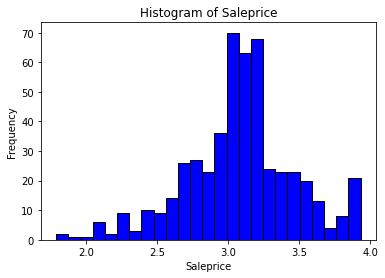

In [31]:
# Histogram of dependent variable
Number_Of_Bins = 25
plt.hist(data['SalePrice'], color = 'blue', edgecolor = 'black', bins = Number_Of_Bins)
plt.title('Histogram of Saleprice')
plt.xlabel('Saleprice')
plt.ylabel('Frequency')

C:\Users\ramon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

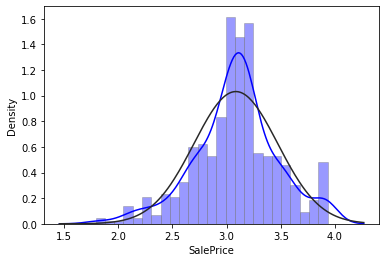

In [32]:
sns.distplot(data['SalePrice'], hist=True, kde=True, 
             bins=Number_Of_Bins, color = 'blue',
             hist_kws={'edgecolor':'grey'},
             fit = stats.norm)

# Certainly some censoring happened for prices above 50 to 50
# Does not look Gaussian

In [33]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

# Positive skewness as expected from the histograms

Skewness: -0.241244
Kurtosis: 0.674053


In [34]:
stats.jarque_bera(data['SalePrice'])

# Reject H0(=data is normal)

Jarque_beraResult(statistic=13.940203094240779, pvalue=0.000939557491633991)

In [35]:
data['SalePrice'] = np.log1p(data['SalePrice'])

C:\Users\ramon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

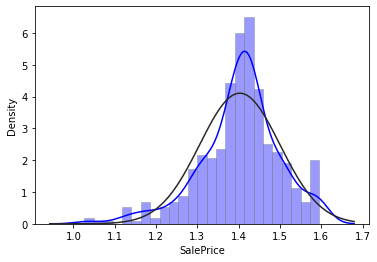

In [36]:
sns.distplot(data['SalePrice'], hist=True, kde=True, 
             bins=Number_Of_Bins, color = 'blue',
             hist_kws={'edgecolor':'grey'},
             fit = stats.norm)
# looks a lot more normal

In [37]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())
# sligthly negative skewed, possibly because of right-side censoring

Skewness: -0.640610
Kurtosis: 1.291183


In [38]:
stats.jarque_bera(data['SalePrice'])
# p-value is still low

Jarque_beraResult(statistic=68.22860286306366, pvalue=1.5543122344752192e-15)

<AxesSubplot:>

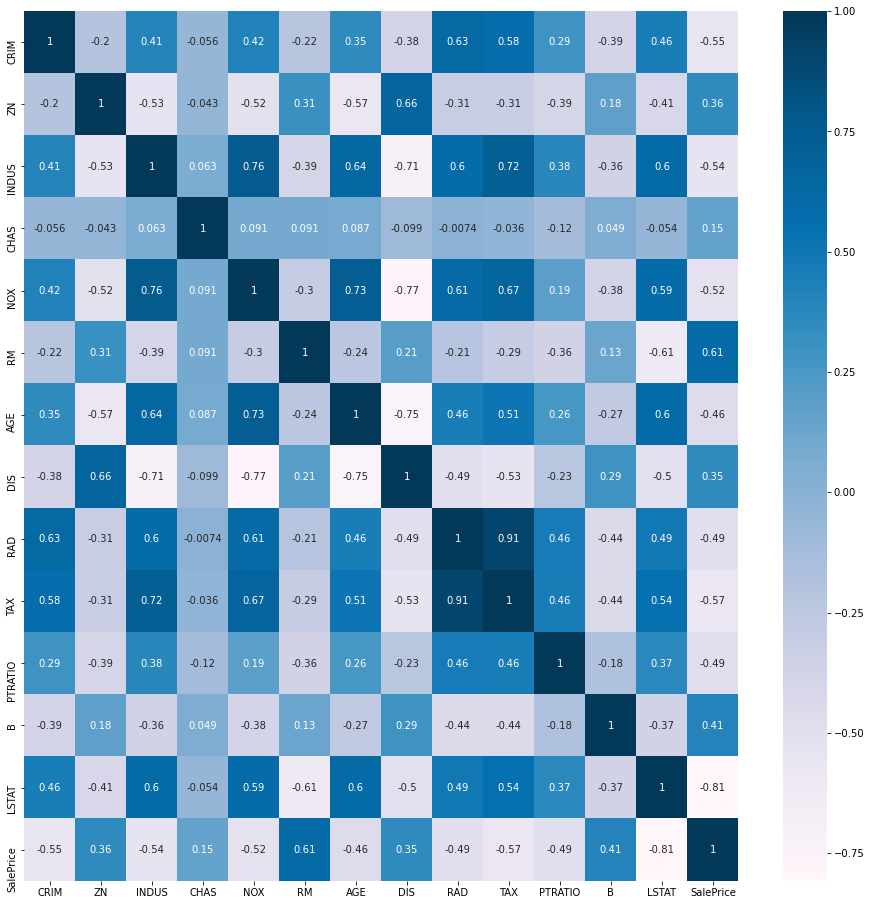

In [39]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.PuBu)